# 2010 Baja CA EQ, QTM Catalog Mapping: β-statistic grid, AFTER
### M >= 0.3
### 3/25/21
### Updated 4/2/21

In [55]:
# IMPORT CELL; updated 2/11/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import obspy.geodetics as gd # Imported whole file
#from obspy.geodetics import locations2degrees # calc_dist() alike?
#from obspy.taup.taup_geo import calc_dist # calc_dist()

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported!")

Imported!


In [56]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range = QTM_Range.loc[QTM_Range['MAGNITUDE'] >= 0.3]
QTM_Range

Wall time: 1.67 s


YEAR  MONTH  DAY  HOUR  MINUTE  SECOND   EVENTID  LATITUDE  LONGITUDE  \
341566  2010      3    5    23      22  38.272  14597244  33.89683 -116.20141   
341568  2010      3    5    23      38   2.630    332210  33.54130 -116.32830   
341574  2010      3    6     0      10  40.142  14597252  33.57379 -116.59561   
341575  2010      3    6     0      17   5.605  14597268  33.33319 -116.23472   
341579  2010      3    6     0      25   3.850    332221  33.18110 -115.70356   
...      ...    ...  ...   ...     ...     ...       ...       ...        ...   
479971  2010      5    4    22      34   3.790    465025  32.71402 -116.02005   
479972  2010      5    4    22      34  42.330  14693572  32.22300 -115.27750   
479973  2010      5    4    22      35  48.290  14693580  32.20351 -115.25989   
479974  2010      5    4    22      36  27.620  36905559  32.65953 -115.79090   
479976  2010      5    4    22      38  21.150    465028  32.66058 -115.71210   

         DEPTH  ...  TEMPLATEID STACKCC    MAD RELOCATED?  \
341566   9.967  ...    14597244     1.0   0.01          1   
341568   9.780  ...    13940968   0.186  0.019          0   
341574  14.313  ...    14597252     1.0   0.01          1   
341575   2.434  ...    14597268     1.0   0.01          1   
341579   5.294  ...    37278008   0.172  0.018          0   
...        ...  ...         ...     ...    ...        ...   
479971   9.038  ...    37045436   0.222  0.021          0   
479972   8.680  ...    14693572     1.0   0.01          0   
479973   3.764  ...    14693580     1.0   0.01          1   
479974   8.256  ...    36905559     1.0   0.01          0   
479976  11.420  ...    14721780   0.211   0.02          0   

                         POSIX TIME     TIMESTAMP  \
341566  2010-03-05T23:22:38.272000Z  1.267831e+09   
341568  2010-03-05T23:38:02.630000Z  1.267832e+09   
341574  2010-03-06T00:10:40.142000Z  1.267834e+09   
341575  2010-03-06T00:17:05.605000Z  1.267835e+09   
341579  2010-03-06T00:25:03.850000Z  1.267835e+09   
...                             ...           ...   
479971  2010-05-04T22:34:03.790000Z  1.273012e+09   
479972  2010-05-04T22:34:42.330000Z  1.273012e+09   
479973  2010-05-04T22:35:48.290000Z  1.273013e+09   
479974  2010-05-04T22:36:27.620000Z  1.273013e+09   
479976  2010-05-04T22:38:21.150000Z  1.273013e+09   

                      VECTORIZATION    VTIMESTAMP  RELATIVE DAY RELATIVE HOUR  
341566  2010-03-05T23:22:38.271999Z  1.267831e+09         -30.0        -719.0  
341568  2010-03-05T23:38:02.629999Z  1.267832e+09         -30.0        -719.0  
341574  2010-03-06T00:10:40.142000Z  1.267834e+09         -30.0        -719.0  
341575  2010-03-06T00:17:05.605000Z  1.267835e+09         -30.0        -718.0  
341579  2010-03-06T00:25:03.850000Z  1.267835e+09         -30.0        -718.0  
...                             ...           ...           ...           ...  
479971  2010-05-04T22:34:03.790000Z  1.273012e+09          30.0         720.0  
479972  2010-05-04T22:34:42.329999Z  1.273012e+09          30.0         720.0  
479973  2010-05-04T22:35:48.289999Z  1.273013e+09          30.0         720.0  
479974  2010-05-04T22:36:27.620000Z  1.273013e+09          30.0         720.0  
479976  2010-05-04T22:38:21.149999Z  1.273013e+09          30.0         720.0  

[60910 rows x 23 columns]

In [57]:
# Set mean latitudes and longitudes
MeanLat = QTM_Range["LATITUDE"].mean()
MeanLon = QTM_Range["LONGITUDE"].mean() 

# Define two more datasets of 30 days before and 30 days after Baja EQ
QTM_TEMP = QTM_Range.loc[QTM_Range["EVENTID"] == ""] # Get Baja EQ
QTM_TEMP = QTM_TEMP.iloc[0]
BajaTimestamp = float(QTM_TEMP["TIMESTAMP"])
BajaTimestamp

1270420842.0

In [58]:
QTM_Range_BEFORE = QTM_Range.loc[QTM_Range["TIMESTAMP"] <= BajaTimestamp]
QTM_Range_AFTER = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]

QTM_Range_BEFORE.describe()
QTM_Range_AFTER

YEAR  MONTH  DAY  HOUR  MINUTE  SECOND   EVENTID  LATITUDE  LONGITUDE  \
356879  2010      4    4    22      40   42.00            32.28600 -115.29500   
356879  2010      4    4    22      40   42.00            32.28600 -115.29500   
356880  2010      4    4    22      40   42.16  14607652  32.27350 -115.29400   
356881  2010      4    4    22      41   45.87    347184  34.43929 -116.93557   
356882  2010      4    4    22      41   54.35    347185  33.16622 -115.59365   
...      ...    ...  ...   ...     ...     ...       ...       ...        ...   
479971  2010      5    4    22      34    3.79    465025  32.71402 -116.02005   
479972  2010      5    4    22      34   42.33  14693572  32.22300 -115.27750   
479973  2010      5    4    22      35   48.29  14693580  32.20351 -115.25989   
479974  2010      5    4    22      36   27.62  36905559  32.65953 -115.79090   
479976  2010      5    4    22      38   21.15    465028  32.66058 -115.71210   

         DEPTH  ...  TEMPLATEID STACKCC    MAD RELOCATED?  \
356879  10.000  ...                                         
356879  10.000  ...                                         
356880  13.990  ...    14607652     1.0   0.01          0   
356881  -0.583  ...     9807541   0.264  0.026          0   
356882   4.499  ...    10531677   0.163  0.017          0   
...        ...  ...         ...     ...    ...        ...   
479971   9.038  ...    37045436   0.222  0.021          0   
479972   8.680  ...    14693572     1.0   0.01          0   
479973   3.764  ...    14693580     1.0   0.01          1   
479974   8.256  ...    36905559     1.0   0.01          0   
479976  11.420  ...    14721780   0.211   0.02          0   

                         POSIX TIME     TIMESTAMP  \
356879  2010-04-04T22:40:42.000000Z  1.270421e+09   
356879  2010-04-04T22:40:42.000000Z  1.270421e+09   
356880  2010-04-04T22:40:42.160000Z  1.270421e+09   
356881  2010-04-04T22:41:45.870000Z  1.270421e+09   
356882  2010-04-04T22:41:54.350000Z  1.270421e+09   
...                             ...           ...   
479971  2010-05-04T22:34:03.790000Z  1.273012e+09   
479972  2010-05-04T22:34:42.330000Z  1.273012e+09   
479973  2010-05-04T22:35:48.290000Z  1.273013e+09   
479974  2010-05-04T22:36:27.620000Z  1.273013e+09   
479976  2010-05-04T22:38:21.150000Z  1.273013e+09   

                      VECTORIZATION    VTIMESTAMP  RELATIVE DAY RELATIVE HOUR  
356879  2010-04-04T22:40:42.000000Z  1.270421e+09           0.0           0.0  
356879  2010-04-04T22:40:42.000000Z  1.270421e+09           0.0           0.0  
356880  2010-04-04T22:40:42.159999Z  1.270421e+09           0.0           0.0  
356881  2010-04-04T22:41:45.869999Z  1.270421e+09           0.0           0.0  
356882  2010-04-04T22:41:54.350000Z  1.270421e+09           0.0           0.0  
...                             ...           ...           ...           ...  
479971  2010-05-04T22:34:03.790000Z  1.273012e+09          30.0         720.0  
479972  2010-05-04T22:34:42.329999Z  1.273012e+09          30.0         720.0  
479973  2010-05-04T22:35:48.289999Z  1.273013e+09          30.0         720.0  
479974  2010-05-04T22:36:27.620000Z  1.273013e+09          30.0         720.0  
479976  2010-05-04T22:38:21.149999Z  1.273013e+09          30.0         720.0  

[56700 rows x 23 columns]

In [59]:
QTM_Range["LONGITUDE"].values[0]
len(QTM_Range)
QTM_Range["LONGITUDE"].values

Faults = pd.read_csv("cafaults.xy", sep = "[\s]", names = ["LONGITUDE", "LATITUDE"])
# Read in fault traces
Faults
#Faults.describe()
#print(Faults.LATITUDE)
#Faults["LONGITUDE"].astype(float)
#Faults = Faults.loc[Faults["LONGITUDE"] == float]
#Faults.columns = ["LONGITUDE", "LATITUDE"]
#Faults
#Faults.LONGITUDE.astype(float)

FaultsIndices = list(Faults.loc[Faults["LONGITUDE"] == ">"].index)
#FaultsIndices

In [60]:
GridPoints = pd.read_csv("Maps/Density Grid/GridPoints.csv")

#### β = (Na - Λ)/√Λ
#### Λ = Nb * Δta/Δtb
Na = number of events during time period of interest delta time,a

Nb = total reference number of events during total reference time period delta time,b

3/23 edit: Nb should not be total # of events from entire subset, should be gridpoint specific too

### β-statistic grid: 2 hours after

In [61]:
0/np.sqrt(0)

nan

In [62]:
%%time

QTM_Range_After_2 = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]
QTM_Range_After_2 = QTM_Range_After_2.loc[QTM_Range_After_2["TIMESTAMP"] < BajaTimestamp + 2*60*60]

GridPoints["Beta_After_2"] = 0.0
for i in range(len(GridPoints)):
    TempDistsNa = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                            QTM_Range_After_2.LATITUDE, QTM_Range_After_2.LONGITUDE),
                            columns = ["DEGDIST"]) # Created DF of data w distances w respect to gridpoint i
    TempDistsNa = TempDistsNa.loc[TempDistsNa.DEGDIST <= 0.1] # Narrowed DF to within 0.1deg of gridpoint i
    NaTemp = len(TempDistsNa)
    
    TempDistsNb = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE), columns = ["DEGDIST"])
    TempDistsNb = TempDistsNb.loc[TempDistsNb.DEGDIST <= 0.1]
    NbTemp = len(TempDistsNb)
    Lambda_After_2 = NbTemp*2/(60*24)
    
    BetaTemp = (NaTemp - Lambda_After_2)/np.sqrt(Lambda_After_2)
    GridPoints["Beta_After_2"][i] = BetaTemp
GridPoints.Beta_After_2 = GridPoints.Beta_After_2.fillna(0)

Wall time: 18.2 s


In [63]:
GridPoints.Beta_After_2.describe()
GridPoints.LATITUDE.max()

34.8

Wall time: 2.29 s


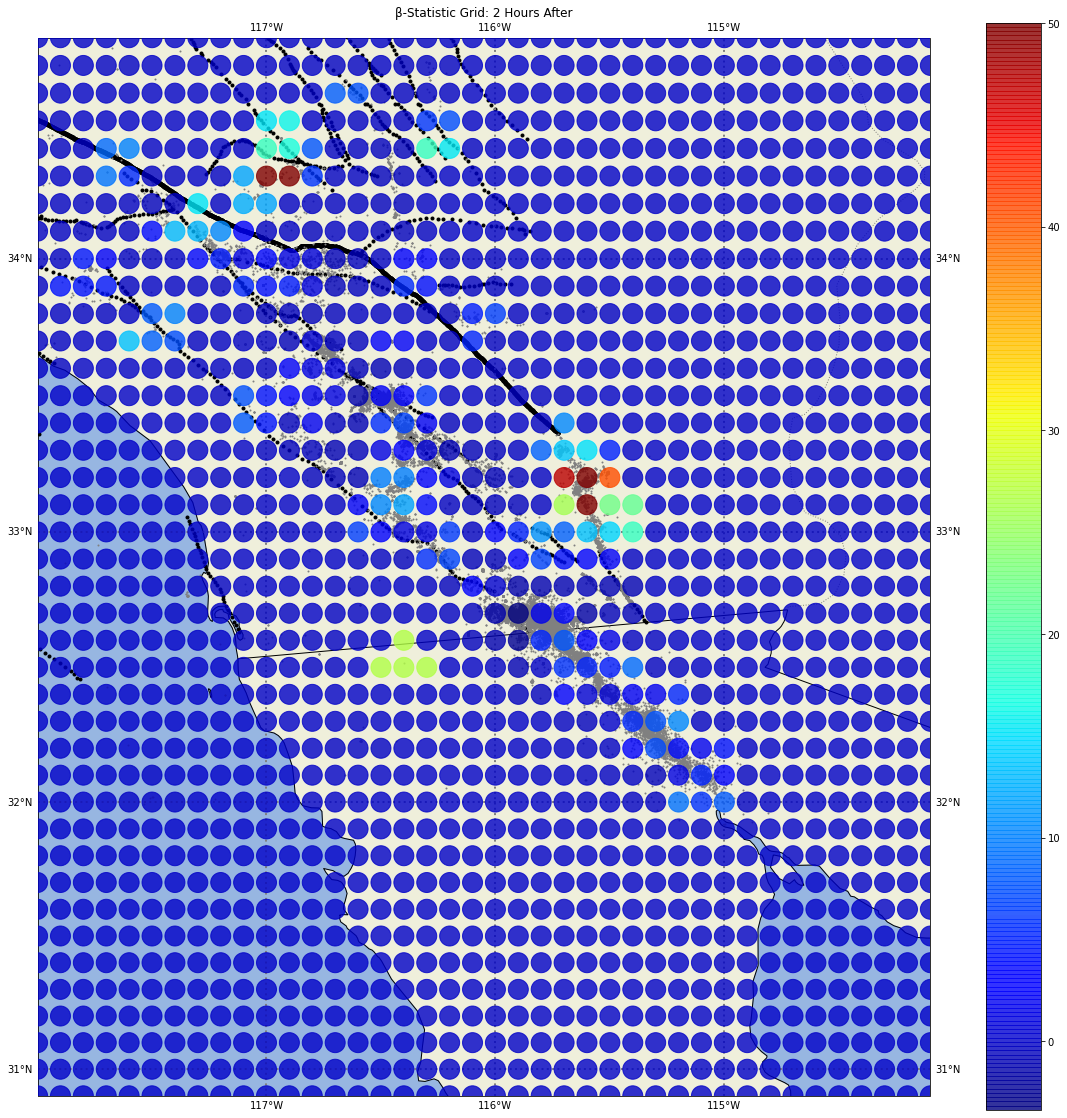

In [64]:
%%time
# Mapping: β-statistic grid - 2 hours after

proj = ccrs.Mercator(globe = None, latitude_true_scale = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([GridPoints.LONGITUDE.min(), GridPoints.LONGITUDE.max(), 
               GridPoints.LATITUDE.min(), GridPoints.LATITUDE.max()])
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")

# 60 days data
plt.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "grey", 
        markersize = 2, linestyle = "None", zorder = 5);

# Plot fault traces
for i in range(len(FaultsIndices) - 1):
    minimum = FaultsIndices[i] + 1 
    maximum = FaultsIndices[i+1] 
    Temp = Faults.iloc[minimum:maximum].astype(float)
    plt.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None", zorder = 1);

# Plot density gridpoints
plt.scatter(x = GridPoints.LONGITUDE, y = GridPoints.LATITUDE, transform = ccrs.PlateCarree(),
            c = GridPoints.Beta_After_2, cmap = mpl.cm.jet, 
            marker = "o", s = 400, alpha = 0.8, zorder = 10, vmax = 50)
plt.title("β-Statistic Grid: 2 Hours After");

plt.colorbar();
plt.savefig("Maps/β-Statistic Grid/After/Above 0.3/1_After_2H_2.png", facecolor = "white");

### β-statistic grid: 12 hours after

In [65]:
%%time

QTM_Range_After_12 = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]
QTM_Range_After_12 = QTM_Range_After_12.loc[QTM_Range_After_12["TIMESTAMP"] < BajaTimestamp + 12*60*60]

GridPoints["Beta_After_12"] = 0.0
for i in range(len(GridPoints)):
    TempDistsNa = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                            QTM_Range_After_12.LATITUDE, QTM_Range_After_12.LONGITUDE),
                            columns = ["DEGDIST"]) # Created DF of data w distances w respect to gridpoint i
    TempDistsNa = TempDistsNa.loc[TempDistsNa.DEGDIST <= 0.1] # Narrowed DF to within 0.1deg of gridpoint i
    NaTemp = len(TempDistsNa)
    
    TempDistsNb = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE), columns = ["DEGDIST"])
    TempDistsNb = TempDistsNb.loc[TempDistsNb.DEGDIST <= 0.1]
    NbTemp = len(TempDistsNb)
    Lambda_After_12 = NbTemp*12/(60*24)
    
    BetaTemp = (NaTemp - Lambda_After_12)/np.sqrt(Lambda_After_12)
    GridPoints["Beta_After_12"][i] = BetaTemp
GridPoints.Beta_After_12 = GridPoints.Beta_After_12.fillna(0)

Wall time: 17.7 s


Wall time: 2 s


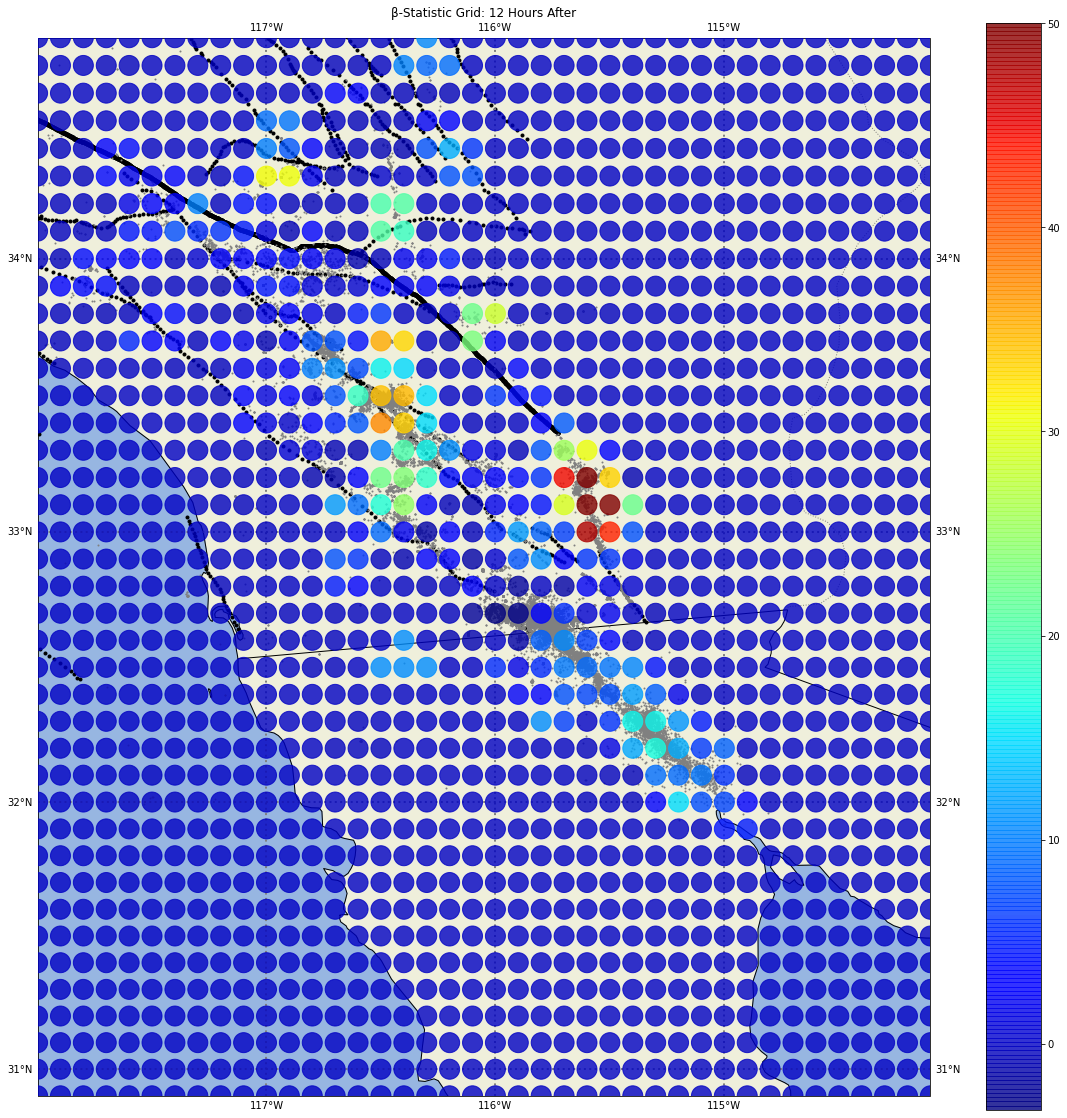

In [66]:
%%time
# Mapping: β-statistic grid - 12 hours after

proj = ccrs.Mercator(globe = None, latitude_true_scale = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([GridPoints.LONGITUDE.min(), GridPoints.LONGITUDE.max(), 
               GridPoints.LATITUDE.min(), GridPoints.LATITUDE.max()])
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")

# 60 days data
plt.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "grey", 
        markersize = 2, linestyle = "None", zorder = 5);

# Plot fault traces
for i in range(len(FaultsIndices) - 1):
    minimum = FaultsIndices[i] + 1 
    maximum = FaultsIndices[i+1] 
    Temp = Faults.iloc[minimum:maximum].astype(float)
    plt.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None", zorder = 1);

# Plot density gridpoints
plt.scatter(x = GridPoints.LONGITUDE, y = GridPoints.LATITUDE, transform = ccrs.PlateCarree(),
            c = GridPoints.Beta_After_12, cmap = mpl.cm.jet, 
            marker = "o", s = 400, alpha = 0.8, zorder = 10, vmax = 50)
plt.title("β-Statistic Grid: 12 Hours After");

plt.colorbar();
plt.savefig("Maps/β-Statistic Grid/After/Above 0.3/2_After_12H_2.png", facecolor = "white");

### β-statistic grid: 24 hours after

In [67]:
%%time

QTM_Range_After_24 = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]
QTM_Range_After_24 = QTM_Range_After_24.loc[QTM_Range_After_24["TIMESTAMP"] < BajaTimestamp + 24*60*60]

GridPoints["Beta_After_24"] = 0.0
for i in range(len(GridPoints)):
    TempDistsNa = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                            QTM_Range_After_24.LATITUDE, QTM_Range_After_24.LONGITUDE),
                            columns = ["DEGDIST"]) # Created DF of data w distances w respect to gridpoint i
    TempDistsNa = TempDistsNa.loc[TempDistsNa.DEGDIST <= 0.1] # Narrowed DF to within 0.1deg of gridpoint i
    NaTemp = len(TempDistsNa)
    
    TempDistsNb = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE), columns = ["DEGDIST"])
    TempDistsNb = TempDistsNb.loc[TempDistsNb.DEGDIST <= 0.1]
    NbTemp = len(TempDistsNb)
    Lambda_After_24 = NbTemp*24/(60*24)
    
    BetaTemp = (NaTemp - Lambda_After_24)/np.sqrt(Lambda_After_24)
    GridPoints["Beta_After_24"][i] = BetaTemp
GridPoints.Beta_After_24 = GridPoints.Beta_After_24.fillna(0)

Wall time: 15.9 s


Wall time: 1.95 s


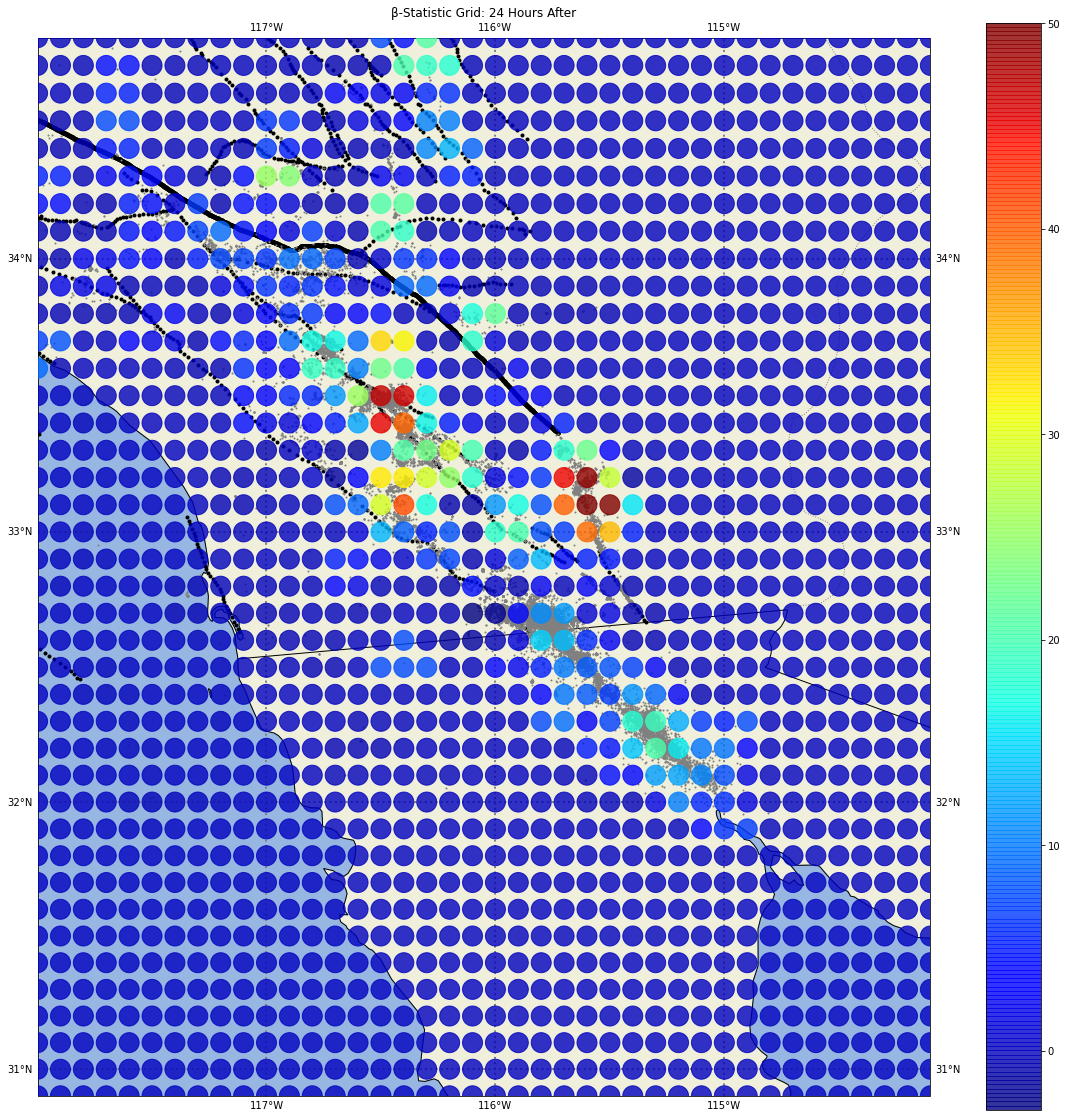

In [68]:
%%time
# Mapping: β-statistic grid - 24 hours after

proj = ccrs.Mercator(globe = None, latitude_true_scale = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([GridPoints.LONGITUDE.min(), GridPoints.LONGITUDE.max(), 
               GridPoints.LATITUDE.min(), GridPoints.LATITUDE.max()])
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")

# 60 days data
plt.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "grey", 
        markersize = 2, linestyle = "None", zorder = 5);

# Plot fault traces
for i in range(len(FaultsIndices) - 1):
    minimum = FaultsIndices[i] + 1 
    maximum = FaultsIndices[i+1] 
    Temp = Faults.iloc[minimum:maximum].astype(float)
    plt.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None", zorder = 1);

# Plot density gridpoints
plt.scatter(x = GridPoints.LONGITUDE, y = GridPoints.LATITUDE, transform = ccrs.PlateCarree(),
            c = GridPoints.Beta_After_24, cmap = mpl.cm.jet, 
            marker = "o", s = 400, alpha = 0.8, zorder = 10, vmax = 50)
plt.title("β-Statistic Grid: 24 Hours After");

plt.colorbar();
plt.savefig("Maps/β-Statistic Grid/After/Above 0.3/3_After_24H_2.png", facecolor = "white");

### β-statistic grid: 7 days after

In [69]:
%%time

QTM_Range_After_7D = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]
QTM_Range_After_7D = QTM_Range_After_7D.loc[QTM_Range_After_7D["TIMESTAMP"] < BajaTimestamp + 24*7*60*60]

GridPoints["Beta_After_7D"] = 0.0
for i in range(len(GridPoints)):
    TempDistsNa = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                            QTM_Range_After_7D.LATITUDE, QTM_Range_After_7D.LONGITUDE),
                            columns = ["DEGDIST"]) # Created DF of data w distances w respect to gridpoint i
    TempDistsNa = TempDistsNa.loc[TempDistsNa.DEGDIST <= 0.1] # Narrowed DF to within 0.1deg of gridpoint i
    NaTemp = len(TempDistsNa)
    
    TempDistsNb = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE), columns = ["DEGDIST"])
    TempDistsNb = TempDistsNb.loc[TempDistsNb.DEGDIST <= 0.1]
    NbTemp = len(TempDistsNb)
    Lambda_After_7D = NbTemp*(24*7)/(60*24)
    
    BetaTemp = (NaTemp - Lambda_After_7D)/np.sqrt(Lambda_After_7D)
    GridPoints["Beta_After_7D"][i] = BetaTemp
GridPoints.Beta_After_7D = GridPoints.Beta_After_7D.fillna(0)

Wall time: 20.3 s


Wall time: 2.17 s


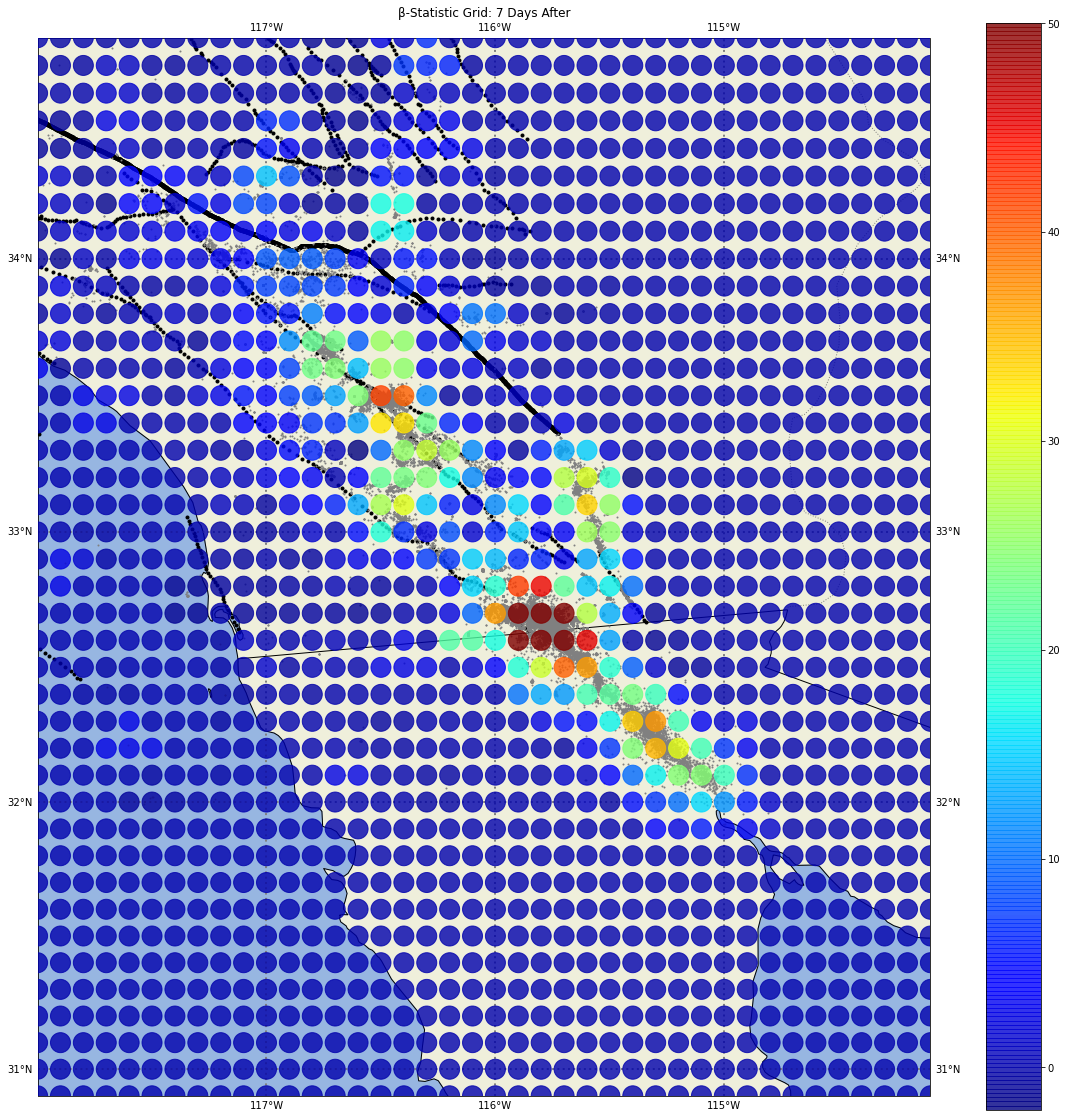

In [70]:
%%time
# Mapping: β-statistic grid - 7 days after

proj = ccrs.Mercator(globe = None, latitude_true_scale = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([GridPoints.LONGITUDE.min(), GridPoints.LONGITUDE.max(), 
               GridPoints.LATITUDE.min(), GridPoints.LATITUDE.max()])
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")

# 60 days data
plt.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "grey", 
        markersize = 2, linestyle = "None", zorder = 5);

# Plot fault traces
for i in range(len(FaultsIndices) - 1):
    minimum = FaultsIndices[i] + 1 
    maximum = FaultsIndices[i+1] 
    Temp = Faults.iloc[minimum:maximum].astype(float)
    plt.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None", zorder = 1);

# Plot density gridpoints
plt.scatter(x = GridPoints.LONGITUDE, y = GridPoints.LATITUDE, transform = ccrs.PlateCarree(),
            c = GridPoints.Beta_After_7D, cmap = mpl.cm.jet, 
            marker = "o", s = 400, alpha = 0.8, zorder = 10, vmax = 50)
plt.title("β-Statistic Grid: 7 Days After");

plt.colorbar();
plt.savefig("Maps/β-Statistic Grid/After/Above 0.3/4_After_7D_2.png", facecolor = "white");

### β-statistic grid: 10 days after

In [71]:
%%time

QTM_Range_After_10D = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]
QTM_Range_After_10D = QTM_Range_After_10D.loc[QTM_Range_After_10D["TIMESTAMP"] < BajaTimestamp + 24*10*60*60]

GridPoints["Beta_After_10D"] = 0.0
for i in range(len(GridPoints)):
    TempDistsNa = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                            QTM_Range_After_10D.LATITUDE, QTM_Range_After_10D.LONGITUDE),
                            columns = ["DEGDIST"]) # Created DF of data w distances w respect to gridpoint i
    TempDistsNa = TempDistsNa.loc[TempDistsNa.DEGDIST <= 0.1] # Narrowed DF to within 0.1deg of gridpoint i
    NaTemp = len(TempDistsNa)
    
    TempDistsNb = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE), columns = ["DEGDIST"])
    TempDistsNb = TempDistsNb.loc[TempDistsNb.DEGDIST <= 0.1]
    NbTemp = len(TempDistsNb)
    Lambda_After_10D = NbTemp*(24*10)/(60*24)
    
    BetaTemp = (NaTemp - Lambda_After_10D)/np.sqrt(Lambda_After_10D)
    GridPoints["Beta_After_10D"][i] = BetaTemp
GridPoints.Beta_After_10D = GridPoints.Beta_After_10D.fillna(0)

Wall time: 21 s


Wall time: 1.73 s


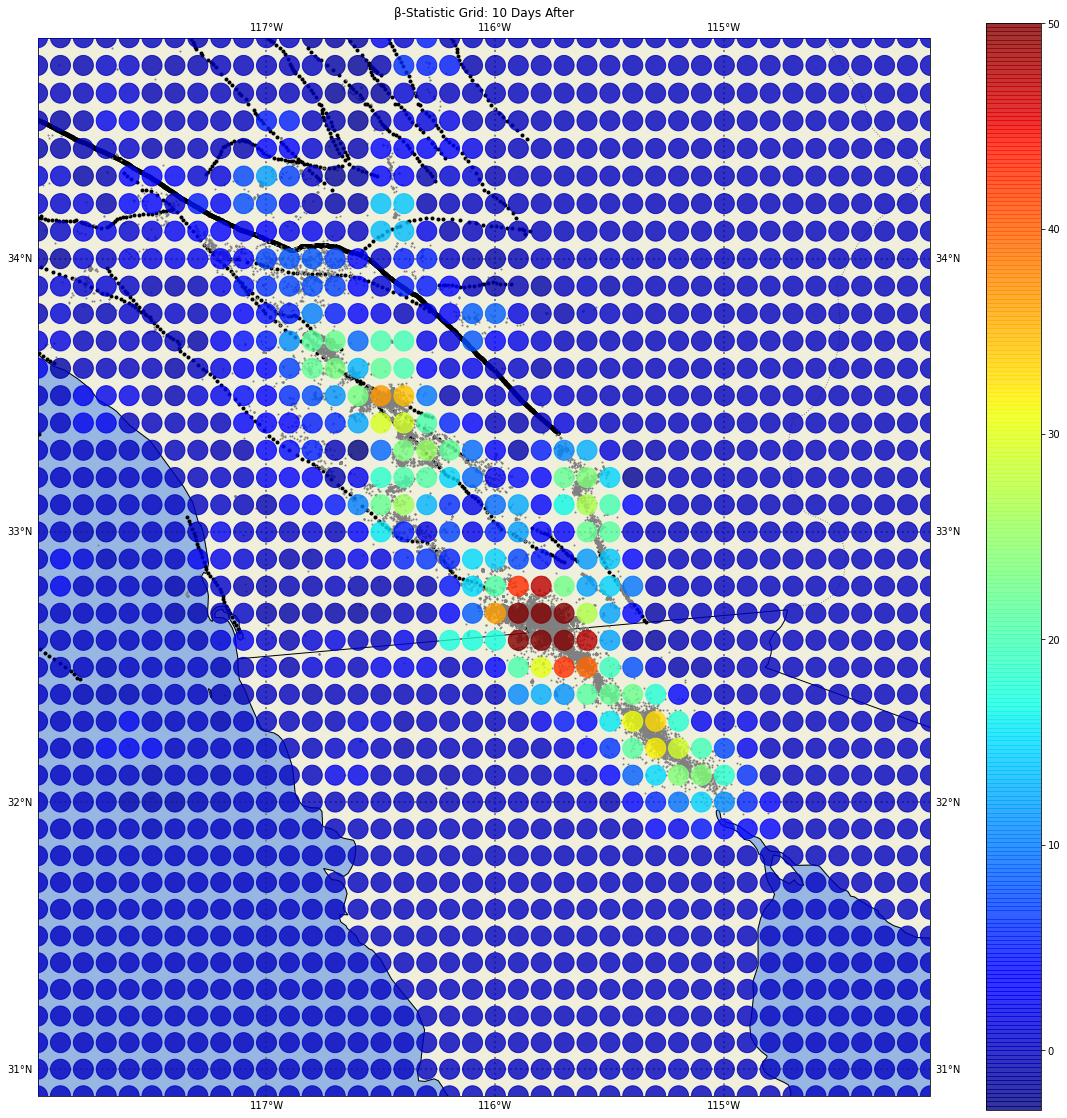

In [72]:
%%time
# Mapping: β-statistic grid - 10 days after

proj = ccrs.Mercator(globe = None, latitude_true_scale = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([GridPoints.LONGITUDE.min(), GridPoints.LONGITUDE.max(), 
               GridPoints.LATITUDE.min(), GridPoints.LATITUDE.max()])
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")

# 60 days data
plt.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "grey", 
        markersize = 2, linestyle = "None", zorder = 5);

# Plot fault traces
for i in range(len(FaultsIndices) - 1):
    minimum = FaultsIndices[i] + 1 
    maximum = FaultsIndices[i+1] 
    Temp = Faults.iloc[minimum:maximum].astype(float)
    plt.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None", zorder = 1);

# Plot density gridpoints
plt.scatter(x = GridPoints.LONGITUDE, y = GridPoints.LATITUDE, transform = ccrs.PlateCarree(),
            c = GridPoints.Beta_After_10D, cmap = mpl.cm.jet, 
            marker = "o", s = 400, alpha = 0.8, zorder = 10, vmax = 50)
plt.title("β-Statistic Grid: 10 Days After");

plt.colorbar();
plt.savefig("Maps/β-Statistic Grid/After/Above 0.3/5_After_10D_2.png", facecolor = "white");

### β-statistic grid: 20 days after

In [73]:
%%time

QTM_Range_After_20D = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]
QTM_Range_After_20D = QTM_Range_After_20D.loc[QTM_Range_After_20D["TIMESTAMP"] < BajaTimestamp + 24*20*60*60]

GridPoints["Beta_After_20D"] = 0.0
for i in range(len(GridPoints)):
    TempDistsNa = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                            QTM_Range_After_20D.LATITUDE, QTM_Range_After_20D.LONGITUDE),
                            columns = ["DEGDIST"]) # Created DF of data w distances w respect to gridpoint i
    TempDistsNa = TempDistsNa.loc[TempDistsNa.DEGDIST <= 0.1] # Narrowed DF to within 0.1deg of gridpoint i
    NaTemp = len(TempDistsNa)
    
    TempDistsNb = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE), columns = ["DEGDIST"])
    TempDistsNb = TempDistsNb.loc[TempDistsNb.DEGDIST <= 0.1]
    NbTemp = len(TempDistsNb)
    Lambda_After_20D = NbTemp*(24*20)/(60*24)
    
    BetaTemp = (NaTemp - Lambda_After_20D)/np.sqrt(Lambda_After_20D)
    GridPoints["Beta_After_20D"][i] = BetaTemp
GridPoints.Beta_After_20D = GridPoints.Beta_After_20D.fillna(0)

Wall time: 25 s


Wall time: 1.79 s


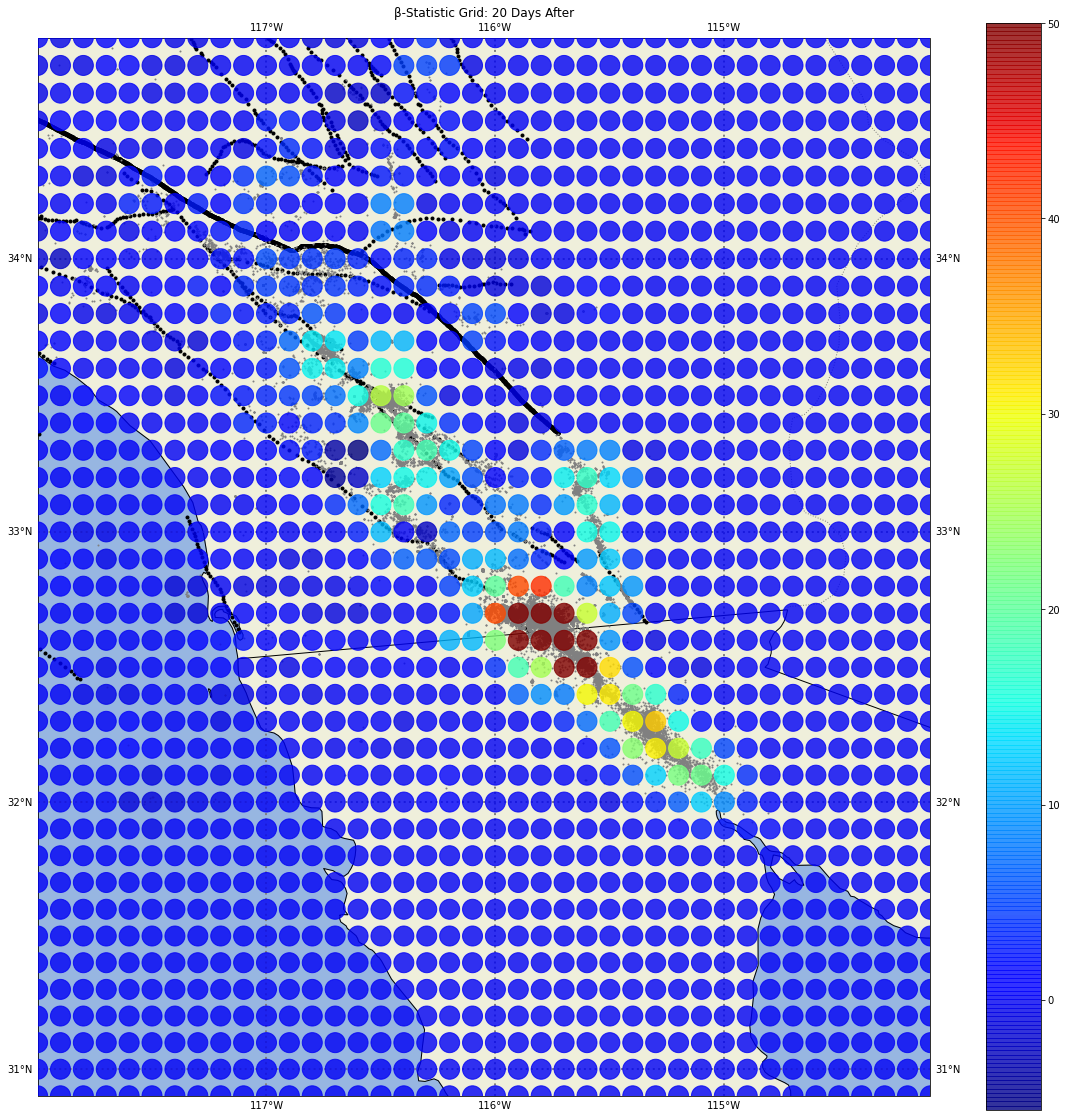

In [74]:
%%time
# Mapping: β-statistic grid - 20 days after

proj = ccrs.Mercator(globe = None, latitude_true_scale = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([GridPoints.LONGITUDE.min(), GridPoints.LONGITUDE.max(), 
               GridPoints.LATITUDE.min(), GridPoints.LATITUDE.max()])
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")

# 60 days data
plt.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "grey", 
        markersize = 2, linestyle = "None", zorder = 5);

# Plot fault traces
for i in range(len(FaultsIndices) - 1):
    minimum = FaultsIndices[i] + 1 
    maximum = FaultsIndices[i+1] 
    Temp = Faults.iloc[minimum:maximum].astype(float)
    plt.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None", zorder = 1);

# Plot density gridpoints
plt.scatter(x = GridPoints.LONGITUDE, y = GridPoints.LATITUDE, transform = ccrs.PlateCarree(),
            c = GridPoints.Beta_After_20D, cmap = mpl.cm.jet, 
            marker = "o", s = 400, alpha = 0.8, zorder = 20, vmax = 50)
plt.title("β-Statistic Grid: 20 Days After");

plt.colorbar();
plt.savefig("Maps/β-Statistic Grid/After/Above 0.3/6_After_20D_2.png", facecolor = "white");

### β-statistic grid: 30 days after

In [75]:
%%time

QTM_Range_After_30D = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]
QTM_Range_After_30D = QTM_Range_After_30D.loc[QTM_Range_After_30D["TIMESTAMP"] < BajaTimestamp + 24*30*60*60]

GridPoints["Beta_After_30D"] = 0.0
for i in range(len(GridPoints)):
    TempDistsNa = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                            QTM_Range_After_30D.LATITUDE, QTM_Range_After_30D.LONGITUDE),
                            columns = ["DEGDIST"]) # Created DF of data w distances w respect to gridpoint i
    TempDistsNa = TempDistsNa.loc[TempDistsNa.DEGDIST <= 0.1] # Narrowed DF to within 0.1deg of gridpoint i
    NaTemp = len(TempDistsNa)
    
    TempDistsNb = pd.DataFrame(data = gd.locations2degrees(GridPoints.LATITUDE[i], GridPoints.LONGITUDE[i],
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE), columns = ["DEGDIST"])
    TempDistsNb = TempDistsNb.loc[TempDistsNb.DEGDIST <= 0.1]
    NbTemp = len(TempDistsNb)
    Lambda_After_30D = NbTemp*(24*30)/(60*24)
    
    BetaTemp = (NaTemp - Lambda_After_30D)/np.sqrt(Lambda_After_30D)
    GridPoints["Beta_After_30D"][i] = BetaTemp
GridPoints.Beta_After_30D = GridPoints.Beta_After_30D.fillna(0)

Wall time: 28.7 s


Wall time: 1.89 s


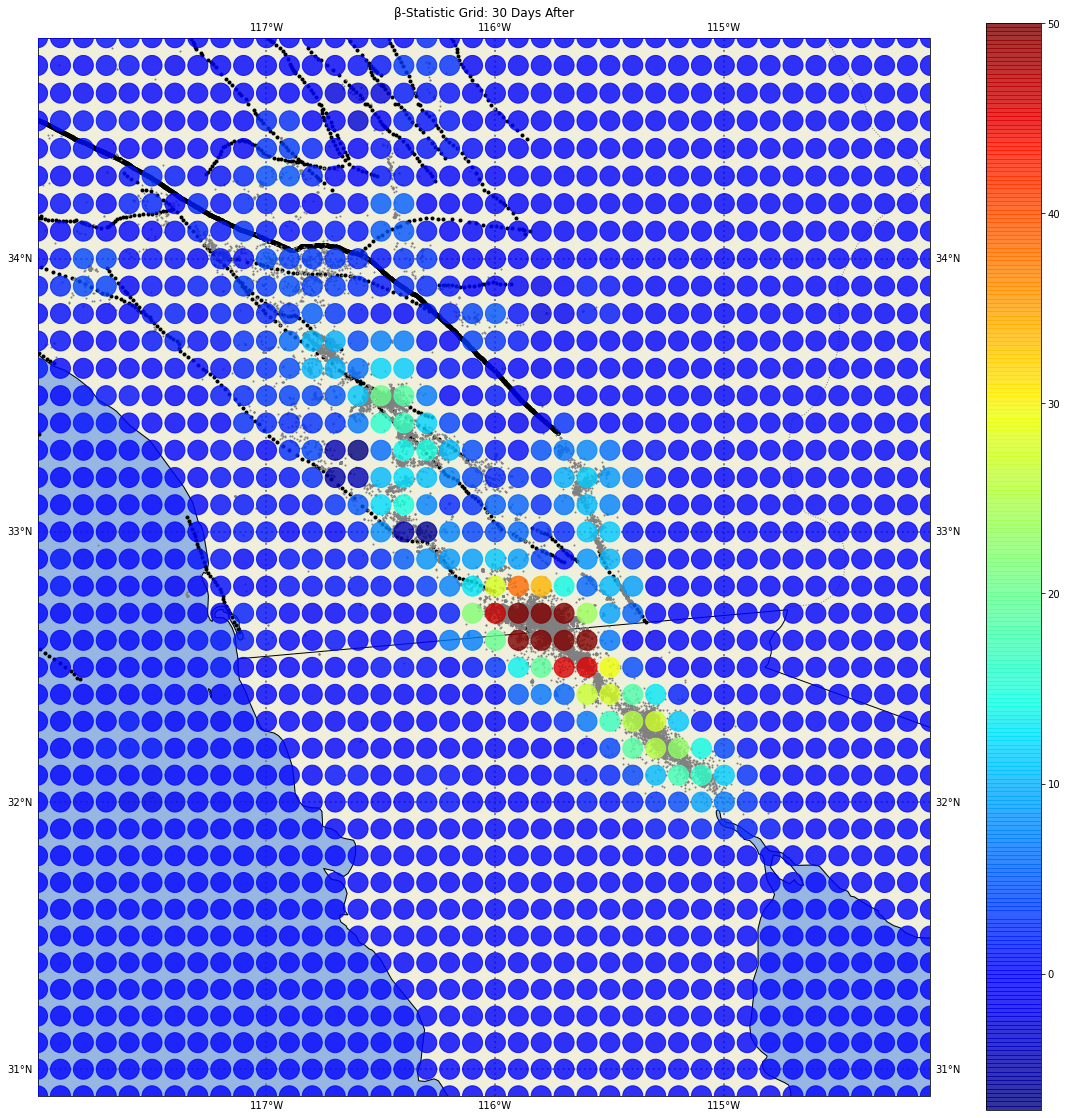

In [76]:
%%time
# Mapping: β-statistic grid - 30 days after

proj = ccrs.Mercator(globe = None, latitude_true_scale = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([GridPoints.LONGITUDE.min(), GridPoints.LONGITUDE.max(), 
               GridPoints.LATITUDE.min(), GridPoints.LATITUDE.max()])
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")

# 60 days data
plt.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "grey", 
        markersize = 2, linestyle = "None", zorder = 5);

# Plot fault traces
for i in range(len(FaultsIndices) - 1):
    minimum = FaultsIndices[i] + 1 
    maximum = FaultsIndices[i+1] 
    Temp = Faults.iloc[minimum:maximum].astype(float)
    plt.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None", zorder = 1);

# Plot density gridpoints
plt.scatter(x = GridPoints.LONGITUDE, y = GridPoints.LATITUDE, transform = ccrs.PlateCarree(),
            c = GridPoints.Beta_After_30D, cmap = mpl.cm.jet, 
            marker = "o", s = 400, alpha = 0.8, zorder = 10, vmax = 50)
plt.title("β-Statistic Grid: 30 Days After");

plt.colorbar();
plt.savefig("Maps/β-Statistic Grid/After/Above 0.3/7_After_30D_2.png", facecolor = "white");